<a href="https://colab.research.google.com/github/tomishing/python_data_science_basics/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecturer's method

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
mpg = pd.read_csv("auto-mpg.csv")

In [ ]:
mpg.head()

- `mpg['weight'].values` – This extracts the values from the 'weight' column of the mpg DataFrame. .values converts the column into a NumPy array.
- `reshape(-1, 1)` – This reshapes the array into a two-dimensional format. The -1 tells NumPy to automatically determine the correct number of rows, while 1 sets it to have one column.

In [ ]:
# Remove any missing values
mpg = mpg.dropna(subset=['weight', 'mpg'])

# Prepare data for regression
X = mpg['weight'].values.reshape(-1, 1)  # Independent variable
y = mpg['mpg'].values                    # Dependent variable

# create and train the model
model = LinearRegression()
model.fit(X,y)


In [ ]:
a = model.coef_[0] # coefficient for the first factor
b = model.intercept_

In [ ]:
print(f"Equation of the line: y = {a:.2f}x + {b:.2f}")

Equation of the line: y = -0.01x + 46.32


In [ ]:
# Predict values
y_pred = model.predict(X)

In [ ]:
r_value, p_value = stats.pearsonr(mpg['weight'], mpg['mpg'])
r_squared = r2_score(y, y_pred)
std_err = np.sqrt(np.sum((y - y_pred) ** 2) / (len(y) - 2))

# Print regression results
print("=== REGRESSION ANALYSIS RESULTS ===")
print(f"Regression Formula: MPG = {b:.4f} + ({a:.4f}) × Weight")
print(f"Alternative Format: y = {b:.4f} + {a:.4f}x")
print()
print("Statistical Measures:")
print(f"Slope (β1): {a:.6f}")
print(f"Intercept (β0): {b:.6f}")
print(f"Correlation coefficient (r): {r_value:.6f}")
print(f"R-squared (r²): {r_squared:.6f}")
print(f"P-value: {p_value:.2e}")
print(f"Standard Error: {std_err:.4f}")
print()

=== REGRESSION ANALYSIS RESULTS ===
Regression Formula: MPG = 46.3174 + (-0.0077) × Weight
Alternative Format: y = 46.3174 + -0.0077x

Statistical Measures:
Slope (β1): -0.007677
Intercept (β0): 46.317364
Correlation coefficient (r): -0.831741
R-squared (r²): 0.691793
P-value: 2.97e-103
Standard Error: 4.3446



In [ ]:
# Interpretation
if abs(r_value) > 0.7:
    strength = "strong"
elif abs(r_value) > 0.3:
    strength = "moderate"
else:
    strength = "weak"

direction = "negative" if r_value < 0 else "positive"
print(f"Interpretation: There is a {strength} {direction} linear relationship")
print(f"between weight and MPG. Weight explains {r_squared*100:.1f}% of the variance in MPG.")

Interpretation: There is a strong negative linear relationship
between weight and MPG. Weight explains 69.2% of the variance in MPG.


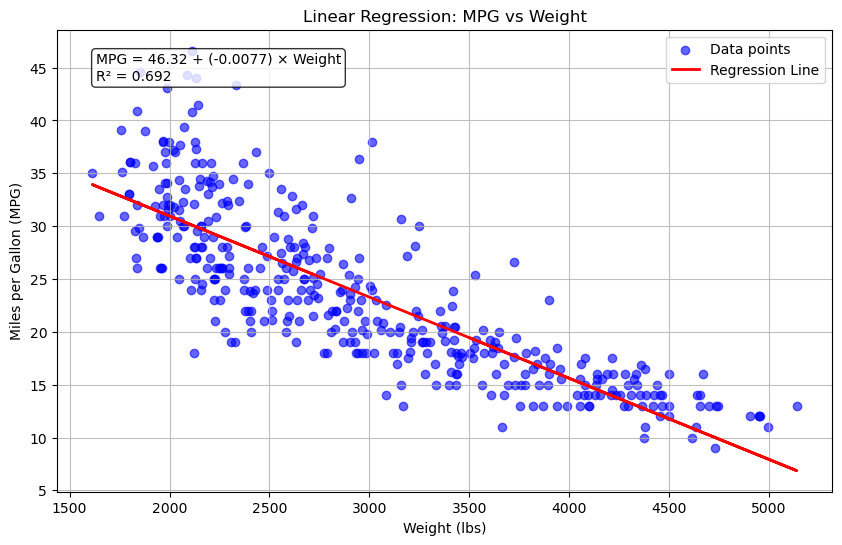

In [ ]:
# Create improved visualization
plt.figure(figsize=(10, 6))
plt.scatter(mpg['weight'], mpg['mpg'], alpha=0.6, color='blue', label='Data points')
plt.plot(mpg['weight'], y_pred, color='red', linewidth=2, label=f'Regression Line')

# Add regression equation to plot
equation_text = f'MPG = {b:.2f} + ({a:.4f}) × Weight\nR² = {r_squared:.3f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         verticalalignment='top', fontsize=10)

plt.xlabel("Weight (lbs)")
plt.ylabel("Miles per Gallon (MPG)")
plt.title("Linear Regression: MPG vs Weight")
plt.legend()
plt.grid(True, alpha=0.8)
#plt.tight_layout()
plt.show()

# Additional diagnostic plot
# plt.figure(figsize=(10, 4))
# plt.show()

# A simple regression presentation:`statmodels`

In [ ]:
import statsmodels.api as sm
# Remove any missing values
mpg = mpg.dropna(subset=['weight', 'mpg'])
# Prepare data for regression
X = mpg['weight'].values.reshape(-1, 1)  # Independent variable
y = mpg['mpg'].values
# Add a constant for the intercept (equivalent to y ~ x in R)
X = sm.add_constant(X)
# Fit the linear model
model = sm.OLS(y, X).fit()
# Display the summary (similar to R's summary(model))
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          2.97e-103
Time:                        23:12:32   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.0

# OLS model
OLS (Ordinary Least Squares) is a fundamental regression method used to estimate the relationship between independent variables (predictors) and a dependent variable. It works by minimizing the sum of squared differences between observed values and the predicted values from a linear equation. In simple terms, it finds the best-fit line that minimizes error.

Other Regression Models:
Apart from OLS, there are several other regression techniques, depending on the data and use case:

- Ridge Regression – Like OLS, but adds a penalty to prevent overfitting.
- Lasso Regression – Helps in feature selection by shrinking some coefficients to zero.
- Polynomial Regression – Extends linear regression to model curves.
- Logistic Regression – Used for classification problems (e.g., predicting "yes" or "no" outcomes).
- Support Vector Regression (SVR) – More flexible for non-linear relationships.
- Decision Trees & Random Forests – Powerful models that work well for complex data.
- Neural Networks – Advanced models used for deep learning applications.

# Skew and Kurtosis
1. Skewness (Symmetry of Distribution)
Skewness measures the asymmetry of data distribution. If a distribution is perfectly symmetrical, its skewness is zero.

- **Positive skew (right-skewed)** → The tail on the right side is longer, meaning most data is concentrated on the left.
- **Negative skew (left-skewed)** → The tail on the left side is longer, meaning most data is concentrated on the right.
- **Zero skew (symmetric)** → The distribution is evenly spread.

2. Kurtosis (Sharpness of Peak)
Kurtosis measures the "tailedness" of a distribution—how much the values deviate from the mean.

- **Leptokurtic (high kurtosis, >3)** → Sharp peak, heavy tails. More extreme outliers.
- **Mesokurtic (normal kurtosis, ~3)** → Looks like a normal distribution (bell curve).
- **Platykurtic (low kurtosis, <3)** → Flatter peak, thin tails. Less extreme outliers.

In [ ]:
from IPython.display import display, Math
y_pred = model.predict(X)
r_squared = model.rsquared
b0, b1 = model.params[0], model.params[1]
print(f'y = {b1:.4f}x + {b0:.2f}')
print(f'R^2={r_squared:.2f}')

y = -0.0077x + 46.32
R^2=0.69


Text(0.5, 1.0, 'Actual vs. Predicted Values')

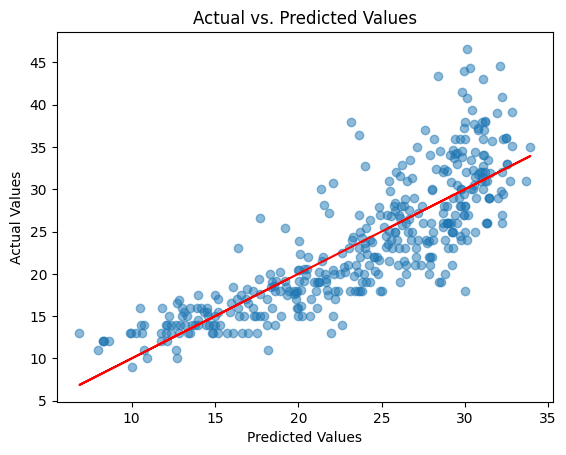

In [ ]:
plt.scatter(y_pred, y, label='Actual data', alpha=0.5)
plt.plot(y_pred, y_pred, color='red', label='Regression line')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Values')

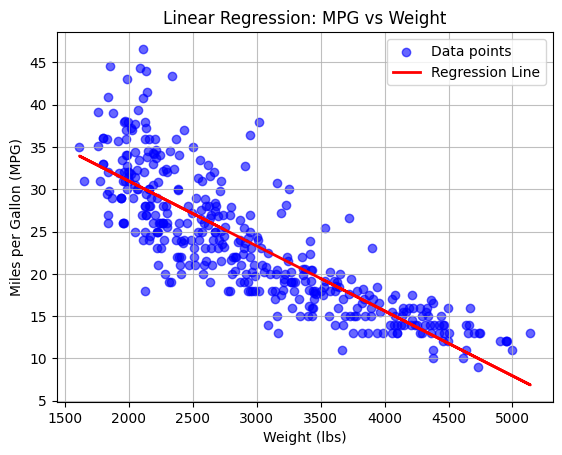

In [ ]:
plt.scatter(mpg['weight'], mpg['mpg'], alpha=0.6, color='blue', label='Data points')
plt.plot(mpg['weight'], y_pred, color='red', linewidth=2, label=f'Regression Line')
plt.xlabel("Weight (lbs)")
plt.ylabel("Miles per Gallon (MPG)")
plt.title("Linear Regression: MPG vs Weight")
plt.legend()
plt.grid(True, alpha=0.8)
#plt.tight_layout()
plt.show()

In [ ]:
# Residuals plot
# lecturer's version
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

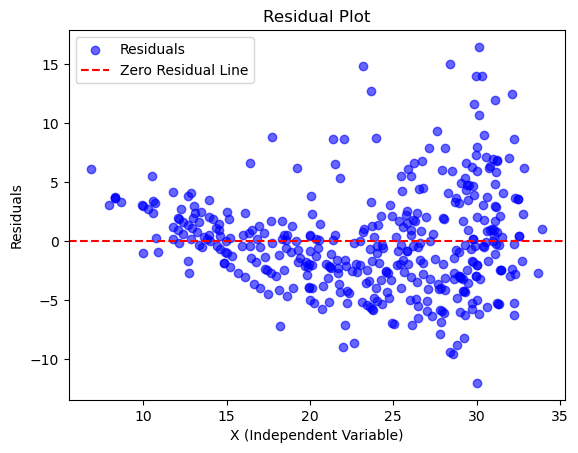

In [ ]:
# Copilot version
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals
#plt.scatter(X[:,1], residuals, color='blue', label="Residuals", alpha=0.6)  # X[:,1] removes the constant column
plt.scatter(y_pred, residuals, color='blue', label="Residuals", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residual Line")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()


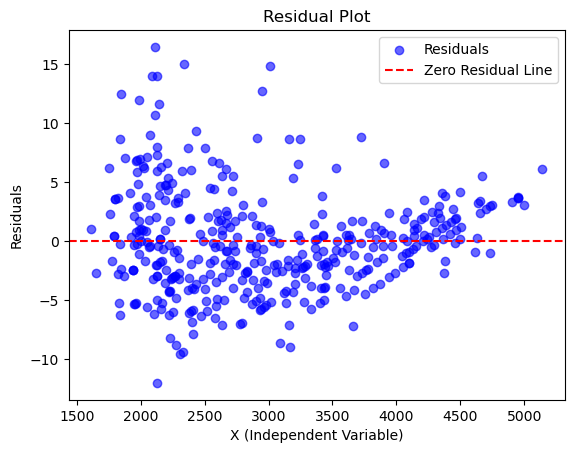

In [ ]:
plt.scatter(X[:,1], residuals, color='blue', label="Residuals", alpha=0.6)  # X[:,1] removes the constant column
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residual Line")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

Exercise 1: Write the code to show the relationship between mpg, and weight and cylinders.

Visualize the results.

In [ ]:
# Remove any missing values
mpg = mpg.dropna(subset=['weight', 'mpg', 'cylinders'])

# Prepare data for regression
X1 = mpg['weight'].values.reshape(-1, 1)  # Independent variable
X2 = mpg['cylinders'].values.reshape(-1, 1)
y = mpg['mpg'].values

In [ ]:
# Combine X1 and X2 into a single 2D array
X = np.column_stack((X1, X2))
# Add a constant (intercept) term
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     453.0
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          5.68e-103
Time:                        11:35:57   Log-Likelihood:                -1145.4
No. Observations:                 398   AIC:                             2297.
Df Residuals:                     395   BIC:                             2309.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3937      0.791     58.660      0.0

In [ ]:
y_pred = model.predict(X)
r_squared = model.rsquared
a1, a2 = model.params[1], model.params[2] #slope
b = model.params[0] #intercept
print(f"y = {a1:.2f}x1 + {a2: .2f}x2 + {b:.2f}")
print(f"R^2 = {r_squared: .3f}")

y = -0.01x1 + -0.70x2 + 46.39
R^2 =  0.696


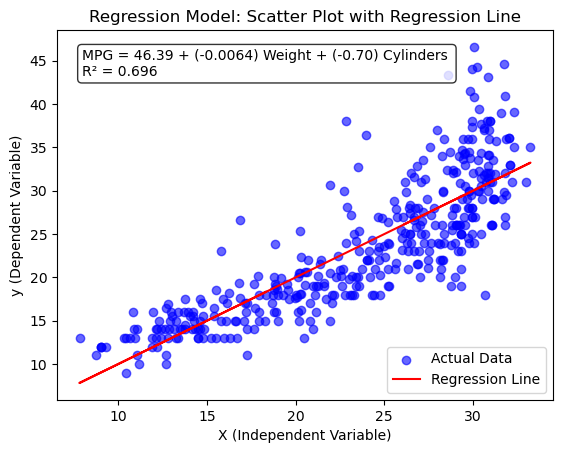

In [ ]:
# Plot scatter plot of actual data
# plt.scatter(X[:, 1], y, color='blue', label='Actual Data')  # X[:,1] removes the constant column
plt.scatter(y_pred, y, color='blue', label='Actual Data', alpha=0.6)
# Plot regression line
plt.plot(y_pred, y_pred, color='red', label='Regression Line')

# Labels and title
plt.xlabel("X (Independent Variable)")
plt.ylabel("y (Dependent Variable)")
plt.title("Regression Model: Scatter Plot with Regression Line")
equation_text = f'MPG = {b:.2f} + ({a1:.4f}) Weight + ({a2: .2f}) Cylinders \nR² = {r_squared:.3f}'
plt.text(0.05, 0.95,
         equation_text,
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         verticalalignment='top', fontsize=10)
plt.legend()

# Show plot
plt.show()

## Seems different from the lecturer's. Is there any difference in these models?